In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

1, 2 завдання для двовимірного датасету:

In [67]:
data_2d = pd.read_csv('data_2d.csv')
X_2d = data_2d.values
print(data_2d.head())

   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  


In [68]:
# Стандартизація даних
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)  # Масштабування даних

# ліктевий метод 
inertia = []
clusters_range = range(1, 11)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_2d)
    inertia.append(kmeans.inertia_)

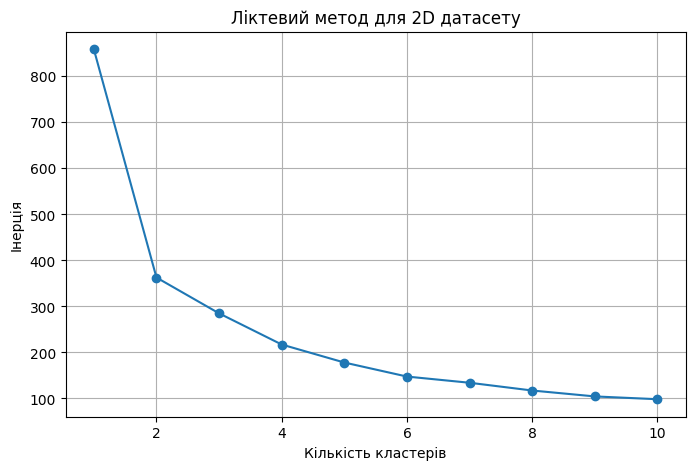

In [69]:
plt.figure(figsize=(8, 5))
plt.plot(clusters_range, inertia, marker='o')
plt.title('Ліктевий метод для 2D датасету')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.grid(True)
plt.show()


На графіку видно, що оптимальна кількість кластерів - 3. тому далі в коді я вибрала саме це число

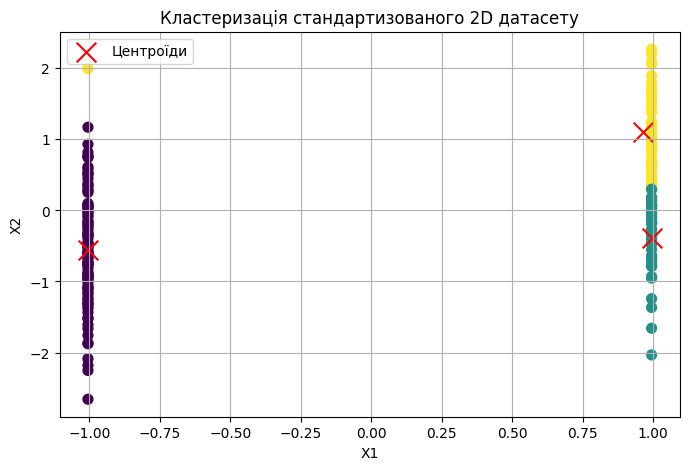

In [70]:
# Кластеризація
k_optimal = 2  # оптимальна кількість кластерів
kmeans_2d_scaled = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels_2d_scaled = kmeans_2d_scaled.fit_predict(X_2d_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=labels_2d_scaled, cmap='viridis', s=50)
plt.scatter(kmeans_2d_scaled.cluster_centers_[:, 0], kmeans_2d_scaled.cluster_centers_[:, 1],
            c='red', marker='x', s=200, label='Центроїди')
plt.title('Кластеризація стандартизованого 2D датасету')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

1, 2 завдання для датасету mnist:

In [71]:
mnist_data = pd.read_csv('mnist.csv')
print(mnist_data.head())

# cтандартизація даних
X_mnist = mnist_data.values
scaler = StandardScaler()
X_mnist_scaled = scaler.fit_transform(X_mnist)

   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


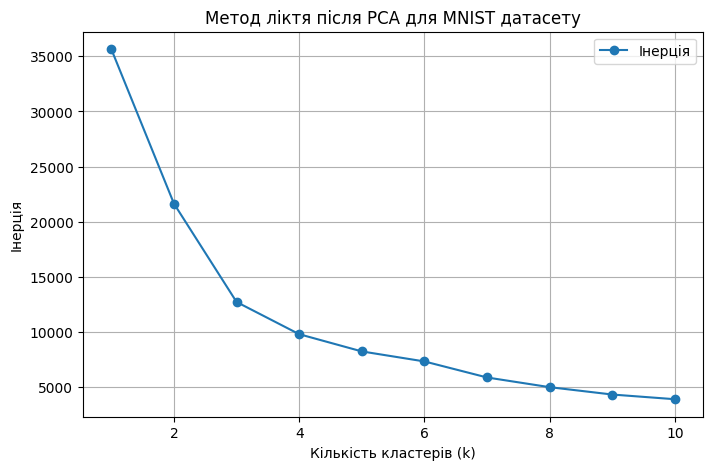

In [72]:
# PCA 
pca = PCA(n_components=2)  # Зменшення до 2 вимірів
X_mnist_pca = pca.fit_transform(X_mnist_scaled)

# ліктевий метод
inertia_mnist = []
silhouette_scores = []
clusters_range = range(1, 11)  # Тестуємо значення k від 1 до 10

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_mnist_pca)
    inertia_mnist.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(clusters_range, inertia_mnist, marker='o', label='Інерція')
plt.title('Метод ліктя після PCA для MNIST датасету')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інерція')
plt.grid(True)
plt.legend()
plt.show() #оптимальна k=4

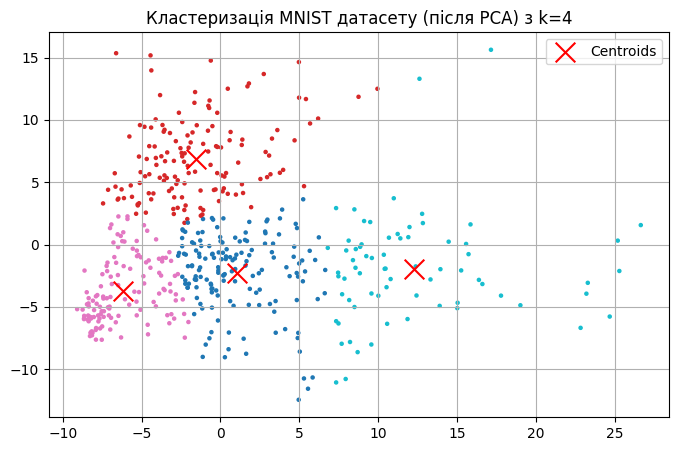

In [73]:
k_optimal = 4
kmeans_mnist = KMeans(n_clusters=k_optimal, random_state=42, n_init="auto")
kmeans_mnist.fit(X_mnist_pca)

labels_mnist = kmeans_mnist.labels_

# Візуалізація
plt.figure(figsize=(8, 5))
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels_mnist, cmap='tab10', s=5)
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, label='Centroids')
plt.title('Кластеризація MNIST датасету (після PCA) з k=4')
plt.grid(True)
plt.legend()
plt.show()
